# Data analysis in Python with Pandas

We start by importing some packages we will use:

In [17]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

N.B.: you do not need to import numpy and matplotlib to use pandas!

Now let us import some data from an excel spreadsheet

If the line below gives an error, try running this:

`/l_mnt/python/envs/teaching/bin/pip install --user xlrd`

This will install a copy of the xlrd module in your local environment. **Ignore this if the line below runs without giving an error!**

In [18]:
df = pd.read_excel("dog_summary.xls", skipfooter=9)

"df" is a commonly used variable name, short for dataframe, the general purpose data structure in pandas

Just like other base types, we can see the content of a pandas dataframe:

In [19]:
df

,Breed,Abrev.,Clade,Samples,Vayasse-1,Hayward-2,Mizzou-3,Total,COO,BioProject
0,American Cocker Spaniel,ACKR,Spaniel,10.0,NaN,NaN,NaN,10,NaN,"GSE90441, GSE96736"
1,American Eskimo Dog,AESK,Nordic Spitz,NaN,NaN,6.0,NaN,6,NaN,NaN
2,Afghan Hound,AFGH,Mediterranean,10.0,NaN,NaN,NaN,10,NaN,GSE90441
3,American Hairless Terrier,AHRT,American Terrier,10.0,NaN,NaN,NaN,10,NaN,GSE96736
4,Airedale Terrier,AIRT,Terrier,3.0,NaN,NaN,NaN,3,NaN,GSE96736
...,...,...,...,...,...,...,...,...,...,...
161,Xoloitzcuintle,XOLO,New World*,NaN,NaN,5.0,NaN,5,NaN,NaN
162,Xoloitzcuintle - Miniature,MXOL,NewWorld*,NaN,NaN,5.0,NaN,5,NaN,NaN
163,Grey Wolf,WOLF,NaN,7.0,NaN,NaN,NaN,7,NaN,GSE90441
164,Golden Jackal,GDJK,NaN,2.0,NaN,NaN,NaN,2,NaN,GSE90441


We can see here how similar to a spreadsheet it is.

Let's see what we can do with it now. We can plot the distribution of sample number.

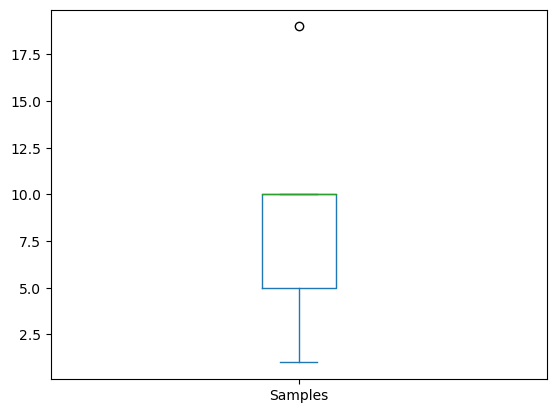

In [30]:
df["Samples"].plot(kind="box")
plt.show()

We can also get summary statistics:

In [22]:
df["Samples"].mean()

7.341085271317829

Can you guess how to get the mean?

The information stored in the dataframe is structured, and different aspects can be accessed using methods and attributes of the dataframe. For example, to get the list of column namesL

In [23]:
df.columns

Index(['Breed', 'Abrev.', 'Clade', 'Samples', 'Vayasse-1', 'Hayward-2',
       'Mizzou-3', 'Total', 'COO', 'BioProject'],
      dtype='object')

Remember, you can use `help()` and `dir()` to get details about the content of the object!

Different plots provide different information:

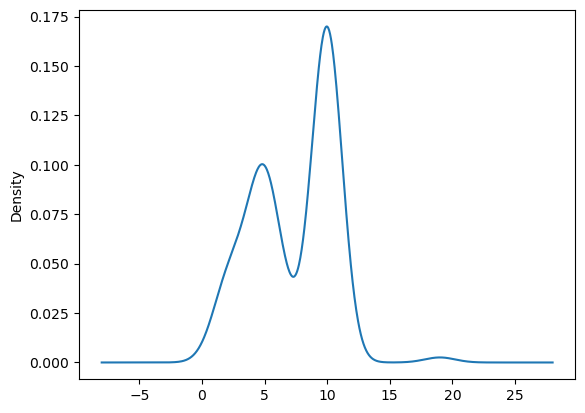

In [29]:
df["Samples"].plot(kind="density")
plt.show()

You can also plot multiple columns at the same time:

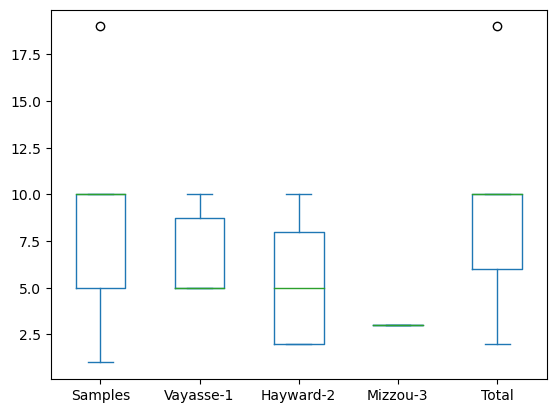

In [28]:
df[['Samples', 'Vayasse-1', 'Hayward-2', 'Mizzou-3', 'Total']].plot(kind="box")
plt.show()

Let's now try and load a large spreadsheet:

In [31]:
df = pd.read_excel("dog_common_haplotypes.xls", skiprows=1, skipfooter=2)

In [34]:
df

,Clades,Breed,Abbrev.,WOLF,BSJI,XIGO,CHTM,TIBM,HUSK,GREE,...,AMST,STAF,MBLT,BULT,FBUL,BOST,DDBX,BULD,BOX,LMUN
0,Wild,Grey Wolf,WOLF,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Basenji,Basenji,BSJI,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AsianSpitz,Xigou,XIGO,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AsianSpitz,Tibetan Mastiff - COO,CHTM,0,0,0,0,17486957,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AsianSpitz,Tibetan Mastiff - USA,TIBM,0,0,0,17486957,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,EuropeanMastiff,French Bulldog,FBUL,0,0,0,0,0,0,0,...,16048059,19575505,0,0,0,24113370,15074396,27828491,17768758,0
164,EuropeanMastiff,Boston Terrier,BOST,0,0,0,0,0,0,0,...,21843606,19786860,12997359,11245228,24113370,0,10715614,21077885,13943000,0
165,EuropeanMastiff,Dogue de Bordeaux,DDBX,0,0,0,0,0,0,0,...,11151008,11299107,0,0,15074396,10715614,0,21793909,50499236,0
166,EuropeanMastiff,Bulldog,BULD,0,0,0,0,0,0,0,...,18884416,19086962,0,12485244,27828491,21077885,21793909,0,34424332,0


This would be difficult to explore manually! First we do some data verification.

Let's check if all the abbreviations have a corresponding column:

In [35]:
for abb in df["Abbrev."]:
    if abb not in df.columns:
        print(abb)
for cname in df.columns:
    if cname not in df["Abbrev."].values:
        print(cname)

Clades
Breed
Abbrev.


It appears a typo sneaked in one of the column name, let's fix it

In [33]:
# let's rename the wrongly named column!
df["LMUN"] = df["KMUN"]
del df["KMUN"]

 Another error needs to be corrected, nested far into the data. How would you spot it yourself?

In [75]:
for name in df.iloc[0:167, 3:]:
    if df.dtypes[name] != "int64":
        print (name)

In [63]:
df.loc[167, "GORD"] = 0
df["GORD"] = df["GORD"].astype(np.int64)

We now filter the data:

In [65]:
dog_data = df.filter(df["Abbrev."])

In [66]:
dog_data

,WOLF,BSJI,XIGO,CHTM,TIBM,HUSK,GREE,AMAL,SHIB,AKIT,...,MAST,AMST,STAF,MBLT,BULT,FBUL,BOST,DDBX,BULD,BOX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,17486957,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,17486957,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0,0,0,0,0,0,0,0,0,0,...,0,16048059,19575505,0,0,0,24113370,15074396,27828491,17768758
164,0,0,0,0,0,0,0,0,0,0,...,0,21843606,19786860,12997359,11245228,24113370,0,10715614,21077885,13943000
165,0,0,0,0,0,0,0,0,0,0,...,0,11151008,11299107,0,0,15074396,10715614,0,21793909,50499236
166,0,0,0,0,0,0,0,0,0,0,...,16292836,18884416,19086962,0,12485244,27828491,21077885,21793909,0,34424332


We now have a relatively "clean" dataset

We can plot this data using matplotlib, and the imshow command:

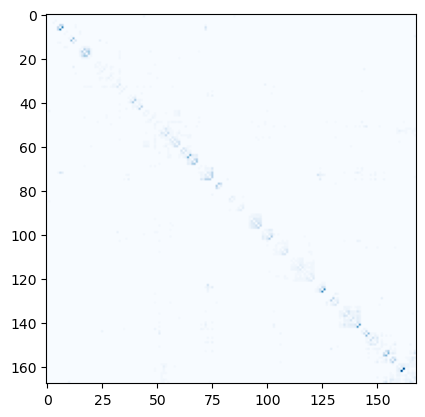

In [67]:
fig, ax = plt.subplots()
# We use the .values attribute, since imshow() expects a numpy array
ax.imshow(dog_data, cmap="Blues")
plt.show()

Let's see what the clustering looks like: what species are closest together?

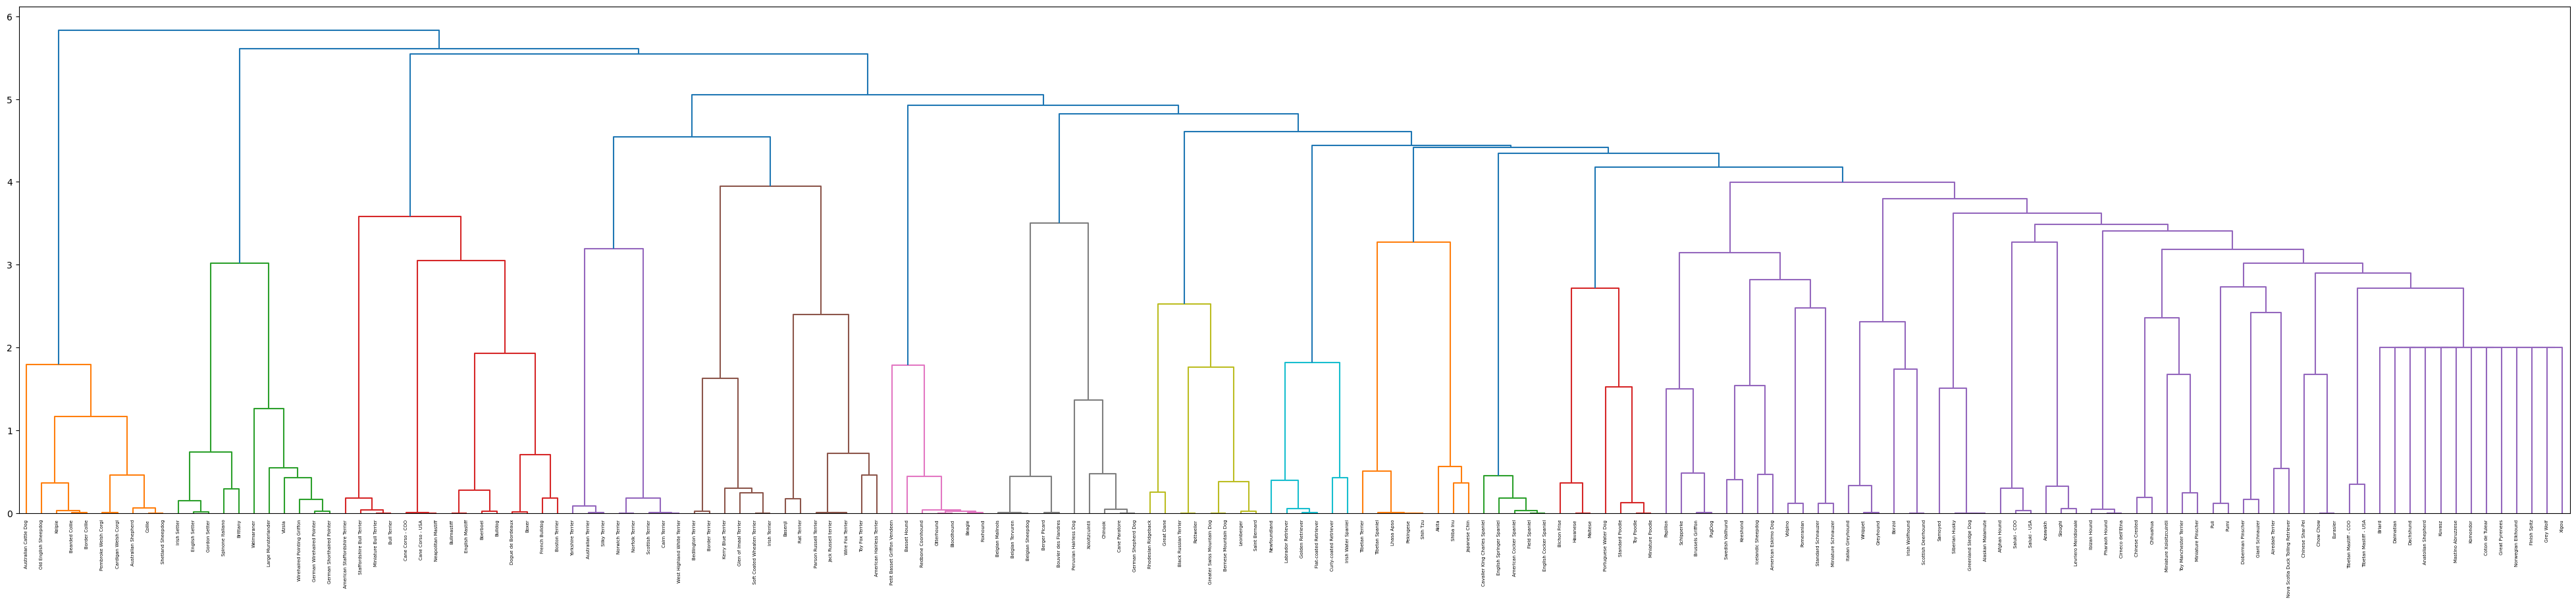

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# We need to tweak the data to make a dendrogram out of it
dog_matrix = dog_data.values
dog_matrix = np.exp(-dog_matrix/10**7)
dm = dog_matrix + dog_matrix.T
x_ = range(len(dm))
dm[x_, x_ ] = 0

Z = linkage(squareform(dm), 'ward')
fig = plt.figure(figsize=(50, 10))
dn = dendrogram(Z, labels=df["Breed"].values)
plt.show()

This plot is not very impressive, and the labels are hard to read!

With enough customisation, we could get something nicer, but let's try to use seaborn, another library built on top of matplotlib and pandas:

In [69]:
import seaborn as sns

/l_mnt/python/envs/teaching/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


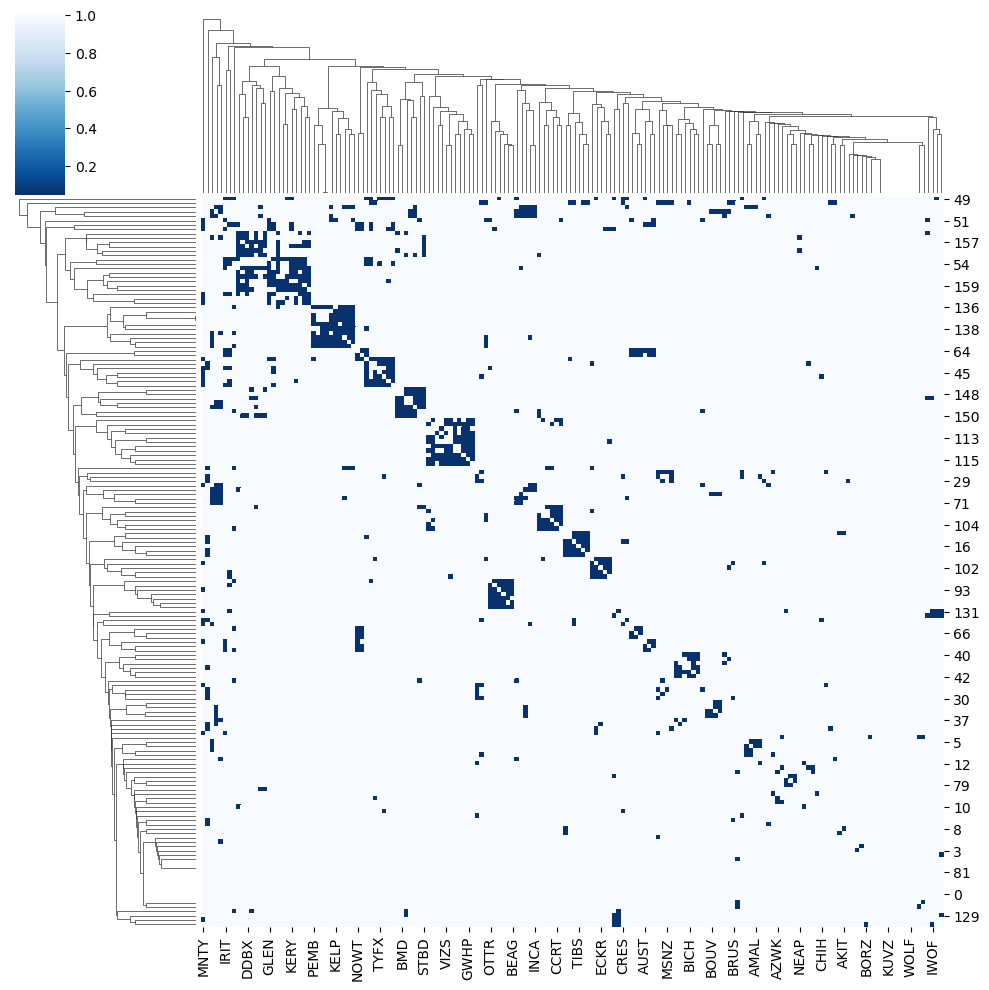

In [71]:
#clustermap expects a distance matrix: the higher the number in our matrix, the "closer" they should be
dog_distance = 1/(np.log(dog_data+1)+1)
sns.clustermap(dog_distance, cmap="Blues_r")
plt.show()

In [72]:
dog_distance

,WOLF,BSJI,XIGO,CHTM,TIBM,HUSK,GREE,AMAL,SHIB,AKIT,...,MAST,AMST,STAF,MBLT,BULT,FBUL,BOST,DDBX,BULD,BOX
0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.0,1.0,1.0,1.000000,0.056571,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.0,1.0,1.0,0.056571,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,0.056847,0.056212,1.000000,1.00000,1.000000,0.055561,0.057050,0.055122,0.056520
164,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,0.055868,0.056178,0.057537,0.05802,0.055561,1.000000,0.058183,0.055979,0.057305
165,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,0.058048,0.058004,1.000000,1.00000,0.057050,0.058183,1.000000,0.055875,0.053369
166,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,0.056798,0.056326,0.056292,1.000000,0.05767,0.055122,0.055979,0.055875,1.000000,0.054483


We can tweak the distance used, as well as the colormap:

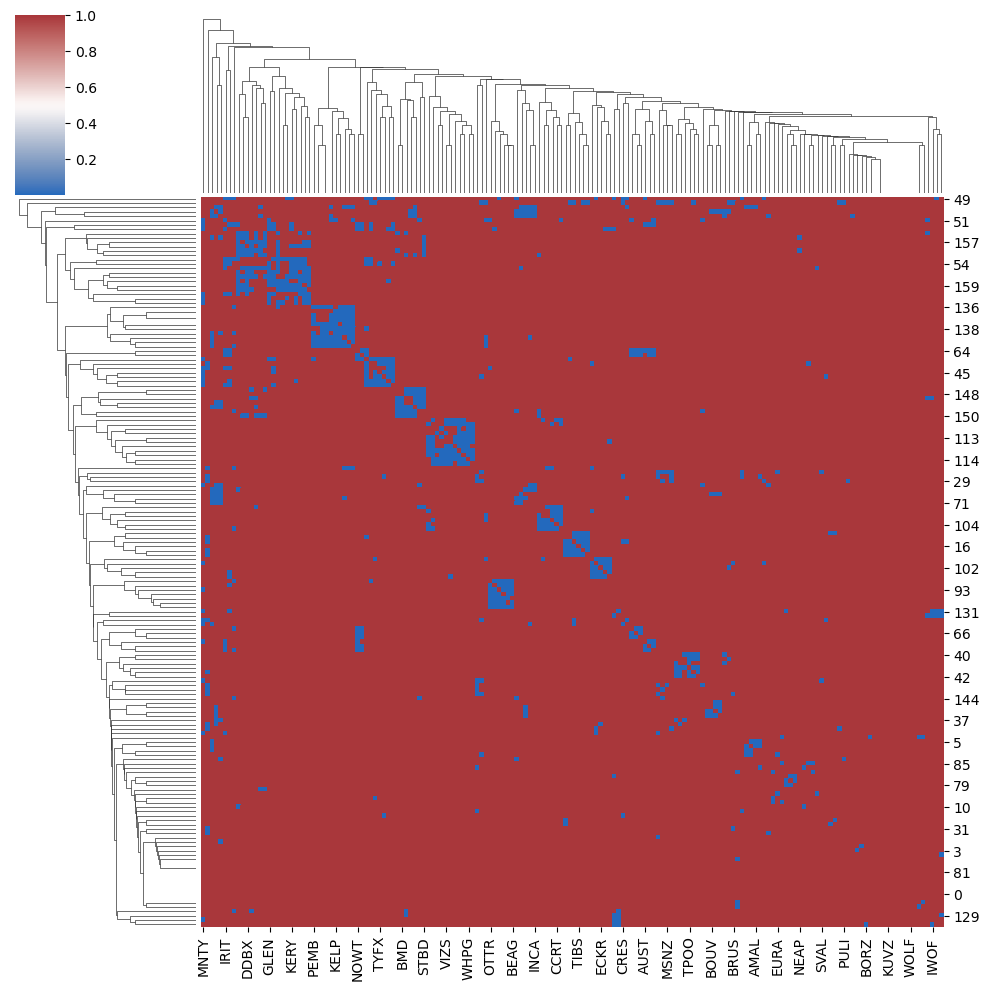

In [30]:
sns.clustermap(1/(dog_data+1), cmap="vlag")
plt.show()

More options are possible, see:

https://seaborn.pydata.org/generated/seaborn.clustermap.html

https://seaborn.pydata.org/examples/structured_heatmap.html